In [6]:
import pandas as pd
import numpy as np
import glob
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt

In [24]:
def show_image(image):
    plt.figure(figsize=(7, 7), )
    plt.imshow(image)

In [7]:
filenames = glob.glob('EX_2_data/*.png')
filenames

['EX_2_data/CT_lab_low_res.png',
 'EX_2_data/Optical.png',
 'EX_2_data/SEM.png',
 'EX_2_data/CT_lab_high_res.png',
 'EX_2_data/test_blob_varying.png',
 'EX_2_data/test_blob_uniform.png',
 'EX_2_data/CT_lab_med_res.png',
 'EX_2_data/CT_synchrotron.png']

### Derive (analytically) the second order derivative of the Gaussian

In [12]:
def second_derivative_gauss(t, multiplier=1):
    window_size = multiplier * t
    x = np.arange(-window_size // 2, window_size // 2 + 1, 1)
    sigma = t ** 0.5
    gauss = -((sigma ** 2 - x ** 2) / (sigma ** 5 * np.sqrt(2 * np.pi))) * np.exp(-(x ** 2) / (2 * sigma ** 2))
    return gauss

### At least 3t

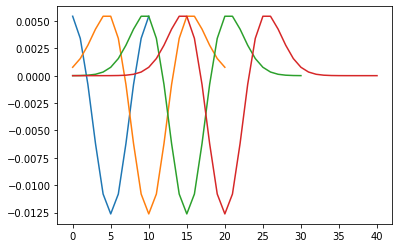

In [18]:
plt.plot(second_derivative_gauss(10, 1))
plt.plot(second_derivative_gauss(10, 2))
plt.plot(second_derivative_gauss(10, 3))
plt.plot(second_derivative_gauss(10, 4))

### Application on the image

In [20]:
def convolve_with_1d_kernel(image, kernel):
    convolved_first = ndimage.convolve(image, [kernel], mode='nearest', cval=0.0)
    convolved_second = ndimage.convolve(convolved_first.T, [kernel], mode='nearest', cval=0.0).T
    return convolved_second

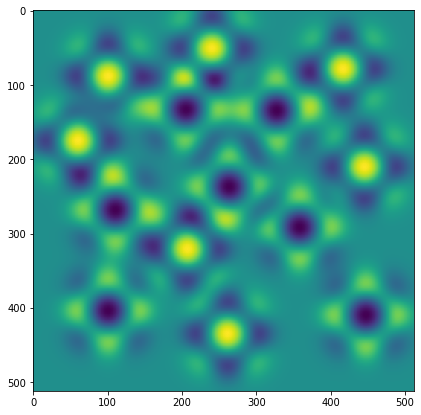

In [26]:
image = plt.imread('EX_2_data/test_blob_uniform.png')
kernel = second_derivative_gauss(325, 3)
convolved = convolve_with_1d_kernel(image, kernel)
show_image(convolved)

### Detecting blobs on one scale

In [27]:
def create_1d_gaussian_kernel(t):
    return signal.gaussian(np.ceil(2 * 3 * t ** 0.5 + 1), std=t ** 0.5)

### Laplacian

In [43]:
def laplacian(image):
    dd_gaussian_kernel = second_derivative_gauss(325)
    gaussian_kernel = create_1d_gaussian_kernel(325)
    
    Lxx = ndimage.convolve(image, [dd_gaussian_kernel], mode='nearest')
    Lxx = ndimage.convolve(Lxx, np.array([gaussian_kernel]).T, mode='nearest')
    
    Lyy = ndimage.convolve(image, np.array([dd_gaussian_kernel]).T, mode='nearest')
    Lyy = ndimage.convolve(Lyy, [gaussian_kernel], mode='nearest')
    
    return Lxx + Lyy    

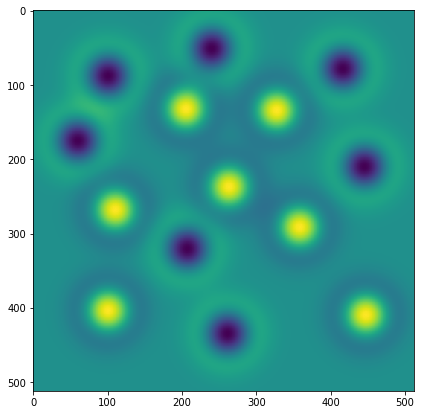

In [97]:
laplacian_image = laplacian(image)
show_image(laplacian_image)

### Detect blobs

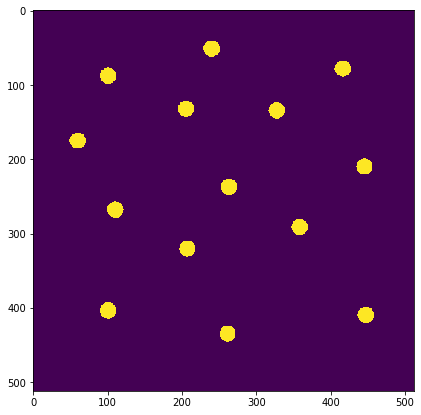

In [90]:
def find_extrema(image):
    lower_bound = np.percentile(image, 1)
    upper_bound = np.percentile(image, 99)
    
    min_max = pd.DataFrame(image)
    min_max = min_max.where(min_max <= upper_bound, -1)
    min_max = min_max.where(min_max >= lower_bound, 1)
    min_max = min_max.where((min_max == 1) | (min_max == -1), 0)

    return min_max

extrema = find_extrema(laplacian_image)
show_image(extrema)

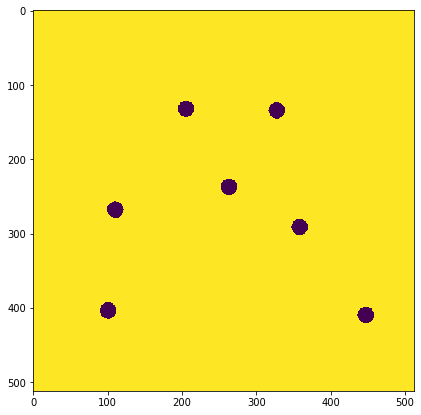

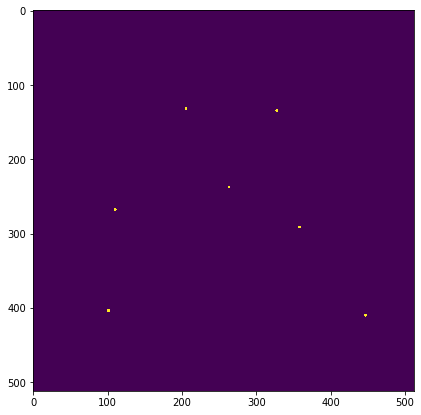

In [117]:
def find_extrema(image):
    lower_bound = np.percentile(image, 1)
    upper_bound = np.percentile(image, 99)
    min_max = pd.DataFrame(image)
    min_max = min_max.where(min_max <= upper_bound, -1)
    min_max = min_max.where((min_max == -1), 0)
    show_image(min_max)
    
    while True:
        min_max = ndimage.binary_erosion(min_max)
        
    
    return min_max
    
extrema = find_extrema(laplacian_image)
show_image(extrema)